In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/simonecammarosano/Desktop/hearth_disease_dataset/utilis'

In [3]:

# Cartella del progetto (una sopra rispetto al notebook)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Percorso al CSV
DATA_PATH = os.path.join(BASE_DIR, "data", "cardio_train.csv")
df = pd.read_csv(DATA_PATH , delimiter=';')

In [4]:
#Informazioni generali sul dataset
print('\n Info:')
df.info()
print("\nStatistiche descrittive:")
print(df.describe().T)
print("\nColonne e tipi:")
df.dtypes


 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

Statistiche descrittive:
               count          mean           std      min       25%      50%  \
id           70000.0  49972.419900  28851.302323      0.0  25006.75  50001.5   
age          700

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
#Controlliamo valori nulli e duplicati
duplicates = df.duplicated()
print('\nNumero di duplicati:', duplicates.sum())
valori_nulli = df.isna()
print('\nNumero di valori nulli:\n', valori_nulli.sum())


Numero di duplicati: 0

Numero di valori nulli:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [6]:
#Visto che l'età è in giorni la convertiamo in anni 
df['age'] = (df['age']/365).astype(int)
print(df['age'])

# Verifica righe in cui la pressione diastolica è maggiore della sistolica
error = df['ap_lo'] > df['ap_hi']
n_error = error.sum()
print(f'\nRighe con ap_lo > ap_hi: {n_error}')

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

Righe con ap_lo > ap_hi: 1234


In [7]:
if n_error > 0:
    print('\nEsempi (ap_hi, ap_lo, cardio):')
    print(df.loc[error, ['ap_hi', 'ap_lo', 'cardio']].head())
    print(df.loc[error, ['ap_hi', 'ap_lo', 'cardio']].tail())


mask = df['ap_hi'] > 250
print(f'Numero righe con ap_hi > 250: {mask.sum()}')
if mask.any():
    # Stampa tutte le righe che soddisfano la condizione
    print(df.loc[mask].to_string(index=False))
else:
    print('Nessuna riga trovata con ap_hi > 250')


Esempi (ap_hi, ap_lo, cardio):
     ap_hi  ap_lo  cardio
228    160   1100       1
241    160   1000       1
260    140    800       1
329    160   1000       1
345    140   1000       1
       ap_hi  ap_lo  cardio
69771    160   1000       1
69872    160   1000       1
69878    160   1000       1
69885    170   1000       0
69967    140   1000       1
Numero righe con ap_hi > 250: 40
   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
 2654   41       1     160    60.0    902     60            1     1      0     0       1       0
 2845   62       2     167    59.0    906      0            1     1      0     0       1       0
 6822   39       1     168    63.0    909     60            2     1      0     0       1       0
11089   57       1     175    80.0  11500     90            1     1      0     0       1       1
12710   51       1     164    75.0   1420     80            2     1      0     0       1       1
13616   62       1     155   

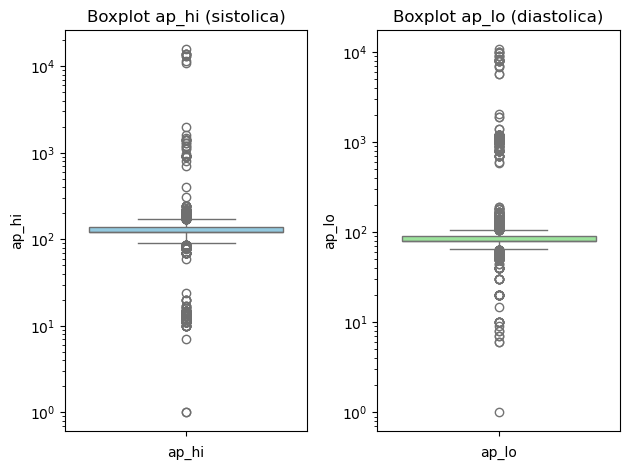

In [8]:
# Boxplot separati affiancati
plt.subplot(1,2,1)
sns.boxplot(y=df['ap_hi'], color='skyblue')
plt.yscale('log')
plt.title('Boxplot ap_hi (sistolica)')
plt.xlabel('ap_hi')

plt.subplot(1,2,2)
sns.boxplot(y=df['ap_lo'], color='lightgreen')
plt.yscale('log')
plt.title('Boxplot ap_lo (diastolica)')
plt.xlabel('ap_lo')

plt.tight_layout()
plt.show()

In [9]:
def remove_outliers_percentile(df, cols, low_q=0.025, high_q=0.975):
    mask = pd.Series(True, index=df.index)
    for c in cols:
        low = df[c].quantile(low_q)
        high = df[c].quantile(high_q)
        mask &= df[c].between(low, high)
    return mask
cols_to_check = ['ap_hi', 'ap_lo']
domain_mask = (
    (df['ap_hi'] > 0) & (df['ap_lo'] > 0) &
    df['ap_hi'].between(40, 250) &
    df['ap_lo'].between(20, 150)
)

In [10]:
percentile_mask = remove_outliers_percentile(df, cols_to_check, 0.025, 0.975)
final_mask = domain_mask & percentile_mask
df_cleaned = df.loc[final_mask].reset_index(drop=True)

# Controlli finali su df_cleaned (usa df_cleaned nelle stampe)
mask_hi250 = df_cleaned['ap_hi'] > 250
print(f'\nNumero righe con ap_hi > 250 (dopo pulizia): {mask_hi250.sum()}')
if mask_hi250.any():
    print(df_cleaned.loc[mask_hi250].to_string(index=False))
else:
    print('\nNessuna riga trovata con ap_hi > 250 (dopo pulizia)')

mask_lo50 = df_cleaned['ap_lo'] < 50
print(f'\nNumero righe con ap_lo < 50 (dopo pulizia): {mask_lo50.sum()}')
if mask_lo50.any():
    print(df_cleaned.loc[mask_lo50].to_string(index=False))
else:
    print('\nNessuna riga trovata con ap_lo < 50 (dopo pulizia)')



Numero righe con ap_hi > 250 (dopo pulizia): 0

Nessuna riga trovata con ap_hi > 250 (dopo pulizia)

Numero righe con ap_lo < 50 (dopo pulizia): 0

Nessuna riga trovata con ap_lo < 50 (dopo pulizia)


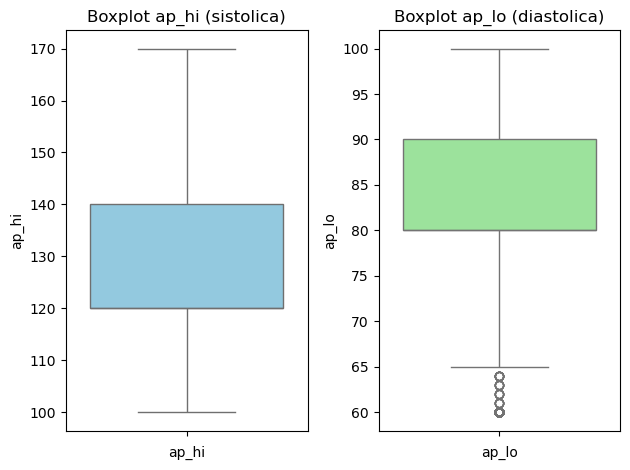

In [11]:
# Boxplot separati affiancati
plt.subplot(1,2,1)
sns.boxplot(y=df_cleaned['ap_hi'], color='skyblue')
plt.title('Boxplot ap_hi (sistolica)')
plt.xlabel('ap_hi')

plt.subplot(1,2,2)
sns.boxplot(y=df_cleaned['ap_lo'], color='lightgreen')
plt.title('Boxplot ap_lo (diastolica)')
plt.xlabel('ap_lo')

plt.tight_layout()
plt.show()


In [12]:
df_cleaned.info()
print(df_cleaned.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66193 entries, 0 to 66192
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           66193 non-null  int64  
 1   age          66193 non-null  int64  
 2   gender       66193 non-null  int64  
 3   height       66193 non-null  int64  
 4   weight       66193 non-null  float64
 5   ap_hi        66193 non-null  int64  
 6   ap_lo        66193 non-null  int64  
 7   cholesterol  66193 non-null  int64  
 8   gluc         66193 non-null  int64  
 9   smoke        66193 non-null  int64  
 10  alco         66193 non-null  int64  
 11  active       66193 non-null  int64  
 12  cardio       66193 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.6 MB
               count          mean           std    min      25%      50%  \
id           66193.0  49978.756696  28858.602294    0.0  24962.0  50030.0   
age          66193.0     52.857069      6.760363   29.0 

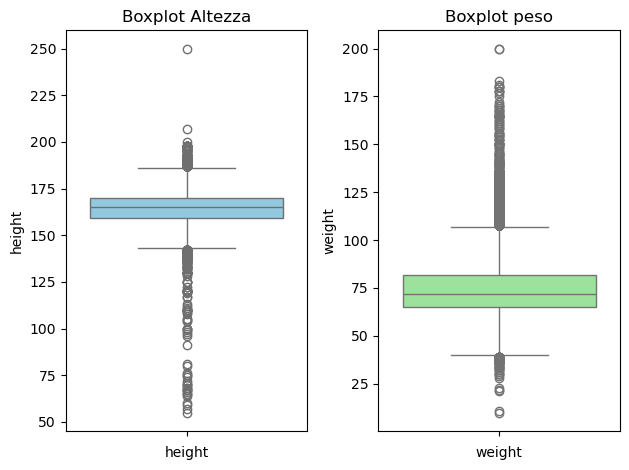

In [13]:
# Boxplot separati affiancati
plt.subplot(1,2,1)
sns.boxplot(y=df['height'], color='skyblue')
plt.title('Boxplot Altezza')
plt.xlabel('height')

plt.subplot(1,2,2)
sns.boxplot(y=df['weight'], color='lightgreen')
plt.title('Boxplot peso')
plt.xlabel('weight')

plt.tight_layout()
plt.show()


In [14]:
# --- Pulizia per altezza e peso (domain + percentili) ---
cols_hw = ['height', 'weight']

# maschera dominio: valori plausibili (cm, kg)
domain_mask_hw = (
    df_cleaned['height'].between(50, 250) &   # altezza plausibile in cm
    df_cleaned['weight'].between(20, 300)     # peso plausibile in kg
)

# maschera percentili (2.5% - 97.5%)
percentile_mask_hw = remove_outliers_percentile(df_cleaned, cols_hw, low_q=0.0001, high_q=0.9999)

# maschera finale e DataFrame pulito
final_mask_hw = domain_mask_hw & percentile_mask_hw
df_hw_cleaned = df_cleaned.loc[final_mask_hw].reset_index(drop=True)

print(f'\nRighe totali: {len(df_cleaned)}')
print(f'Righe rimosse con pulizia height/weight: {len(df_cleaned) - len(df_hw_cleaned)}')


Righe totali: 66193
Righe rimosse con pulizia height/weight: 22


In [15]:
df_hw_cleaned.info()
print()
print(df_hw_cleaned[['height','weight']].describe().T)
print()
df_hw_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66171 entries, 0 to 66170
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           66171 non-null  int64  
 1   age          66171 non-null  int64  
 2   gender       66171 non-null  int64  
 3   height       66171 non-null  int64  
 4   weight       66171 non-null  float64
 5   ap_hi        66171 non-null  int64  
 6   ap_lo        66171 non-null  int64  
 7   cholesterol  66171 non-null  int64  
 8   gluc         66171 non-null  int64  
 9   smoke        66171 non-null  int64  
 10  alco         66171 non-null  int64  
 11  active       66171 non-null  int64  
 12  cardio       66171 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.6 MB

          count        mean        std   min    25%    50%    75%    max
height  66171.0  164.435584   8.071928  67.0  159.0  165.0  170.0  198.0
weight  66171.0   74.087997  14.075744  30.0   65.0   72.0   82

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
df_hw_cleaned['BMI'] = df_hw_cleaned['weight']/((df_hw_cleaned['height']/100)**2)
df_hw_cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66166,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
66167,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
66168,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
66169,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [17]:
# Cartella data
DATA_DIR = os.path.join(BASE_DIR, "data")
print(DATA_DIR)

/Users/simonecammarosano/Desktop/hearth_disease_dataset/data


In [18]:
output_path = os.path.join(DATA_DIR, "cardio_db.csv")
df_hw_cleaned.to_csv(output_path, index=False)

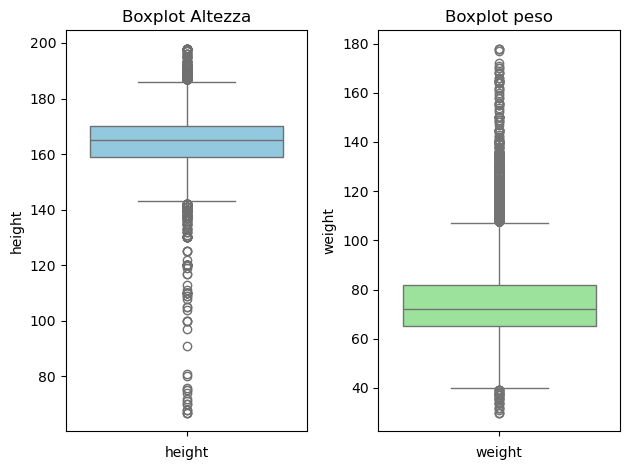

In [19]:
# Boxplot separati affiancati
plt.subplot(1,2,1)
sns.boxplot(y=df_hw_cleaned['height'], color='skyblue')
plt.title('Boxplot Altezza')
plt.xlabel('height')

plt.subplot(1,2,2)
sns.boxplot(y=df_hw_cleaned['weight'], color='lightgreen')
plt.title('Boxplot peso')
plt.xlabel('weight')

plt.tight_layout()
plt.show()

In [20]:
# Rappresentazione in percentuale
gender_percent = df_hw_cleaned['gender'].value_counts(normalize=True) * 100
print("\nPercentuali:")
print(gender_percent)


Percentuali:
gender
1    65.004307
2    34.995693
Name: proportion, dtype: float64


In [21]:
# Tabella incrociata genere vs malattie cardiache
cross_tab = pd.crosstab(df['gender'], df['cardio'], margins=True)
print("Tabella incrociata Genere vs Malattie Cardiache:")
print(cross_tab)
print("\n")

# Con percentuali
cross_tab_percent = pd.crosstab(df_hw_cleaned['gender'], df_hw_cleaned['cardio'], normalize='index') * 100
print("Percentuali per genere:")
print(cross_tab_percent.round(2))

Tabella incrociata Genere vs Malattie Cardiache:
cardio      0      1    All
gender                     
1       22914  22616  45530
2       12107  12363  24470
All     35021  34979  70000


Percentuali per genere:
cardio      0      1
gender              
1       50.70  49.30
2       50.73  49.27


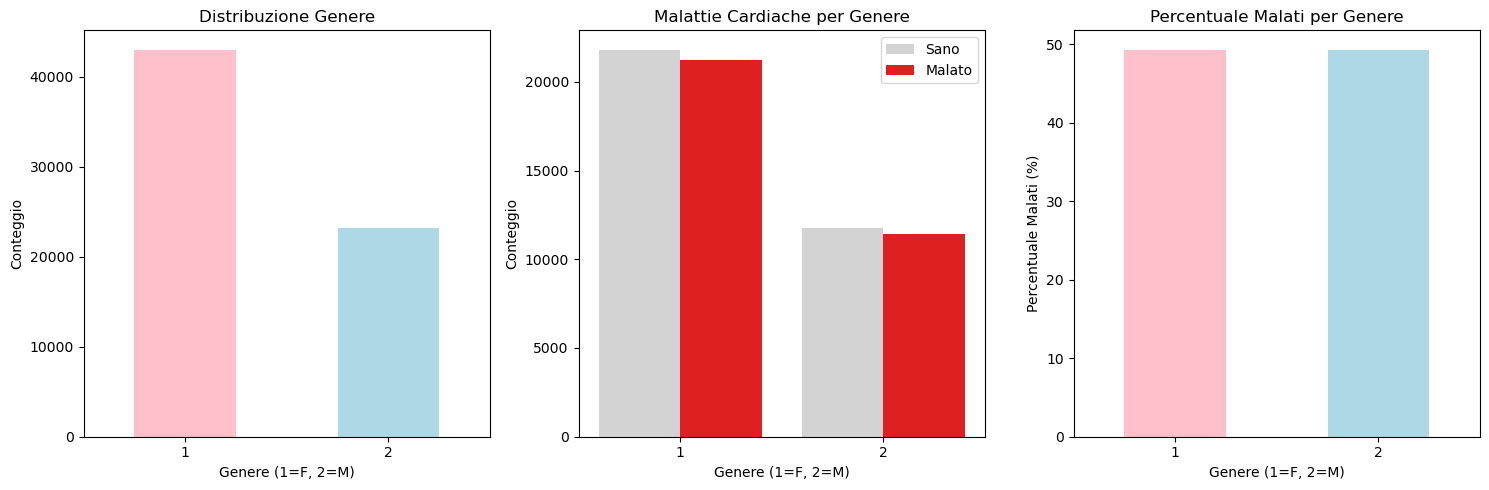

In [22]:
# Configurazione grafici
plt.figure(figsize=(15, 5))

# Subplot 1: Distribuzione genere
plt.subplot(1, 3, 1)
df_hw_cleaned['gender'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Distribuzione Genere')
plt.xlabel('Genere (1=F, 2=M)')
plt.ylabel('Conteggio')
plt.xticks(rotation=0)

# Subplot 2: Malattie cardiache per genere
plt.subplot(1, 3, 2)
sns.countplot(data=df_hw_cleaned, x='gender', hue='cardio', palette=['lightgray', 'red'])
plt.title('Malattie Cardiache per Genere')
plt.xlabel('Genere (1=F, 2=M)')
plt.ylabel('Conteggio')
plt.legend(['Sano', 'Malato'])

# Subplot 3: Percentuale malati per genere
plt.subplot(1, 3, 3)
cardio_by_gender = df_hw_cleaned.groupby('gender')['cardio'].mean() * 100
cardio_by_gender.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Percentuale Malati per Genere')
plt.xlabel('Genere (1=F, 2=M)')
plt.ylabel('Percentuale Malati (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [23]:
df_categorical = df_hw_cleaned.loc[:, ['gender','cholesterol','gluc', 'smoke', 'alco', 'active']]
df_categorical

,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
4,1,1,1,0,0,0
...,...,...,...,...,...,...
66166,1,1,1,0,0,1
66167,2,1,1,1,0,1
66168,1,2,2,0,0,1
66169,1,1,2,0,0,0


In [24]:
df_categorical = pd.get_dummies(df_hw_cleaned, columns=['gender', 'cholesterol', 'gluc'], drop_first=True)
df_categorical

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,50,168,62.0,110,80,0,0,1,0,21.967120,True,False,False,False,False
1,1,55,156,85.0,140,90,0,0,1,1,34.927679,False,False,True,False,False
2,2,51,165,64.0,130,70,0,0,0,1,23.507805,False,False,True,False,False
3,3,48,169,82.0,150,100,0,0,1,1,28.710479,True,False,False,False,False
4,4,47,156,56.0,100,60,0,0,0,0,23.011177,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66166,99992,57,165,80.0,150,80,0,0,1,1,29.384757,False,False,False,False,False
66167,99993,52,168,76.0,120,80,1,0,1,0,26.927438,True,False,False,False,False
66168,99995,61,158,126.0,140,90,0,0,1,1,50.472681,False,True,False,True,False
66169,99998,61,163,72.0,135,80,0,0,0,1,27.099251,False,False,False,True,False


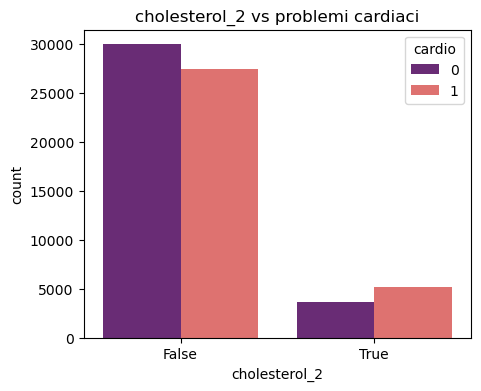

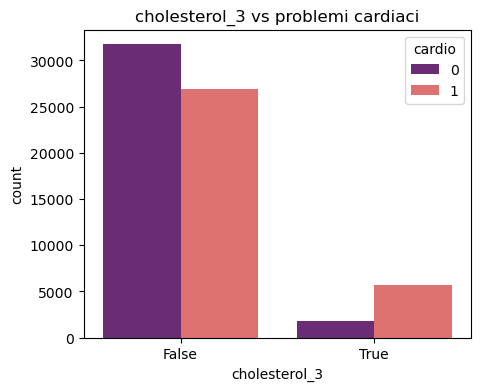

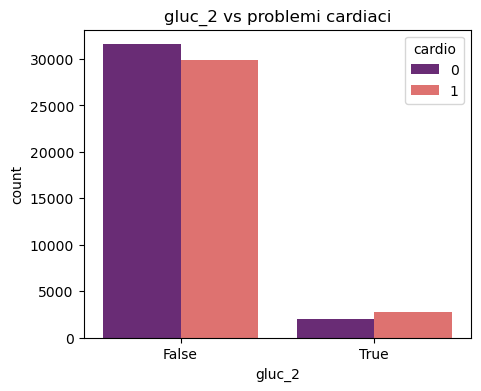

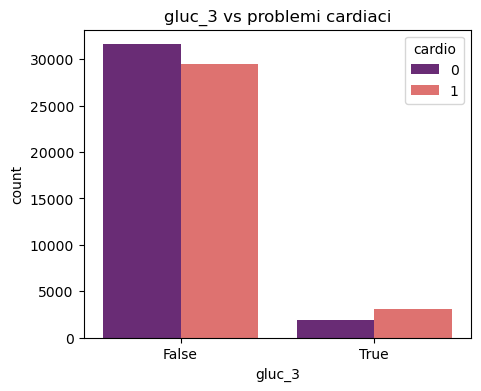

In [25]:
multiclass_vars = ['cholesterol_2','cholesterol_3','gluc_2','gluc_3']

for col in multiclass_vars:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, hue='cardio', data=df_categorical, palette='magma')
    plt.title(f"{col} vs problemi cardiaci")
    plt.show()


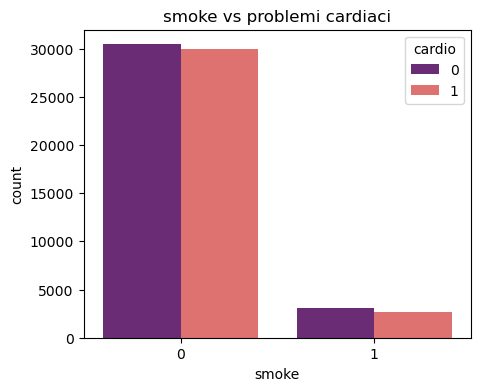

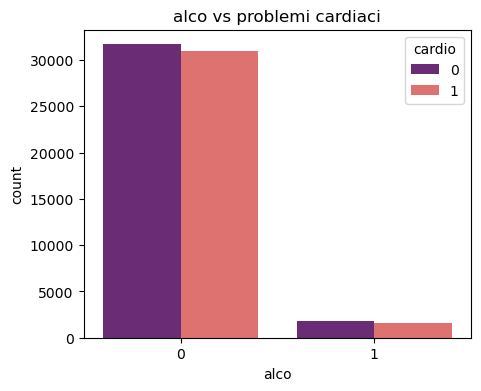

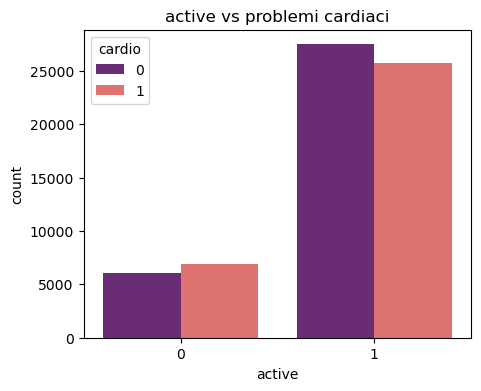

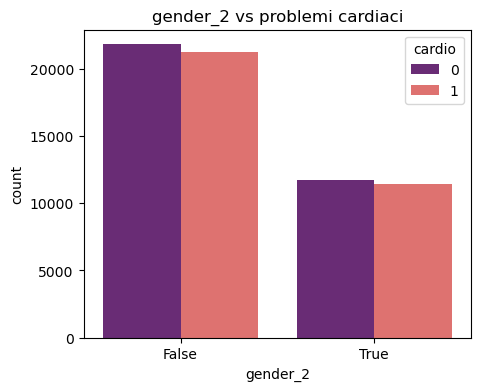

In [26]:
binary_vars = ['smoke', 'alco', 'active', 'gender_2']

for col in binary_vars:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, hue='cardio', data=df_categorical, palette='magma')
    plt.title(f"{col} vs problemi cardiaci")
    plt.show()

In [27]:
for col in binary_vars + multiclass_vars:
    table = pd.crosstab(df_categorical['cardio'], df_categorical[col], normalize='columns')*100
    print(f"\nPercentuale di malati per {col}:\n", table.round(1))



Percentuale di malati per smoke:
 smoke      0     1
cardio            
0       50.4  53.8
1       49.6  46.2

Percentuale di malati per alco:
 alco       0     1
cardio            
0       50.6  53.2
1       49.4  46.8

Percentuale di malati per active:
 active     0     1
cardio            
0       46.9  51.7
1       53.1  48.3

Percentuale di malati per gender_2:
 gender_2  False  True 
cardio                
0          50.7   50.7
1          49.3   49.3

Percentuale di malati per cholesterol_2:
 cholesterol_2  False  True 
cardio                     
0               52.2   40.8
1               47.8   59.2

Percentuale di malati per cholesterol_3:
 cholesterol_3  False  True 
cardio                     
0               54.2   23.9
1               45.8   76.1

Percentuale di malati per gluc_2:
 gluc_2  False  True 
cardio              
0        51.4   41.8
1        48.6   58.2

Percentuale di malati per gluc_3:
 gluc_3  False  True 
cardio              
0        51.7   38.6
1       

In [28]:
df_categorical

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,50,168,62.0,110,80,0,0,1,0,21.967120,True,False,False,False,False
1,1,55,156,85.0,140,90,0,0,1,1,34.927679,False,False,True,False,False
2,2,51,165,64.0,130,70,0,0,0,1,23.507805,False,False,True,False,False
3,3,48,169,82.0,150,100,0,0,1,1,28.710479,True,False,False,False,False
4,4,47,156,56.0,100,60,0,0,0,0,23.011177,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66166,99992,57,165,80.0,150,80,0,0,1,1,29.384757,False,False,False,False,False
66167,99993,52,168,76.0,120,80,1,0,1,0,26.927438,True,False,False,False,False
66168,99995,61,158,126.0,140,90,0,0,1,1,50.472681,False,True,False,True,False
66169,99998,61,163,72.0,135,80,0,0,0,1,27.099251,False,False,False,True,False


In [29]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66171 entries, 0 to 66170
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             66171 non-null  int64  
 1   age            66171 non-null  int64  
 2   height         66171 non-null  int64  
 3   weight         66171 non-null  float64
 4   ap_hi          66171 non-null  int64  
 5   ap_lo          66171 non-null  int64  
 6   smoke          66171 non-null  int64  
 7   alco           66171 non-null  int64  
 8   active         66171 non-null  int64  
 9   cardio         66171 non-null  int64  
 10  BMI            66171 non-null  float64
 11  gender_2       66171 non-null  bool   
 12  cholesterol_2  66171 non-null  bool   
 13  cholesterol_3  66171 non-null  bool   
 14  gluc_2         66171 non-null  bool   
 15  gluc_3         66171 non-null  bool   
dtypes: bool(5), float64(2), int64(9)
memory usage: 5.9 MB


In [30]:
df_categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
id,66171.0,49977.117786,28858.562616,0.000000,24959.500000,50031.000000,74885.500000,99999.000000
age,66171.0,52.857279,6.760496,29.000000,48.000000,53.000000,58.000000,64.000000
height,66171.0,164.435584,8.071928,67.000000,159.000000,165.000000,170.000000,198.000000
weight,66171.0,74.087997,14.075744,30.000000,65.000000,72.000000,82.000000,178.000000
ap_hi,66171.0,126.252709,14.459689,100.000000,120.000000,120.000000,140.000000,170.000000
ap_lo,66171.0,81.183948,8.402919,60.000000,80.000000,80.000000,90.000000,100.000000
smoke,66171.0,0.087516,0.282591,0.000000,0.000000,0.000000,0.000000,1.000000
alco,66171.0,0.052878,0.223792,0.000000,0.000000,0.000000,0.000000,1.000000
active,66171.0,0.803539,0.397324,0.000000,1.000000,1.000000,1.000000,1.000000
cardio,66171.0,0.492875,0.499953,0.000000,0.000000,0.000000,1.000000,1.000000


In [31]:
df_categorical.select_dtypes(exclude='number').columns

Index(['gender_2', 'cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3'], dtype='object')

In [32]:
df_categorical.shape

(66171, 16)

In [33]:
df_categorical['BMI'] = df_categorical['weight']/((df_categorical['height']/100)**2)
df_categorical

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,50,168,62.0,110,80,0,0,1,0,21.967120,True,False,False,False,False
1,1,55,156,85.0,140,90,0,0,1,1,34.927679,False,False,True,False,False
2,2,51,165,64.0,130,70,0,0,0,1,23.507805,False,False,True,False,False
3,3,48,169,82.0,150,100,0,0,1,1,28.710479,True,False,False,False,False
4,4,47,156,56.0,100,60,0,0,0,0,23.011177,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66166,99992,57,165,80.0,150,80,0,0,1,1,29.384757,False,False,False,False,False
66167,99993,52,168,76.0,120,80,1,0,1,0,26.927438,True,False,False,False,False
66168,99995,61,158,126.0,140,90,0,0,1,1,50.472681,False,True,False,True,False
66169,99998,61,163,72.0,135,80,0,0,0,1,27.099251,False,False,False,True,False


In [34]:
#creare la classificazione in base al BMI sottopeso normo obeso
def bmi_classificazione(b):
    if pd.isna(b):
        return None
    if b < 18.5:
        return 'sottopeso'
    elif b < 25:
        return 'normopeso'
    elif b < 30:
        return 'sovrappeso'
    else:
        return 'obeso'

# Applichiamo la classificazione e mostriamo il risultato
if 'bmi_cat' in df_categorical.columns:
    df_categorical = df_categorical.drop(columns=['bmi_cat'])

df_categorical['bmi_cat'] = df_categorical['BMI'].apply(bmi_classificazione)
print('Distribuzione categorie BMI (bmi_cat):')
print(df_categorical['bmi_cat'].value_counts())

Distribuzione categorie BMI (bmi_cat):
bmi_cat
normopeso     24617
sovrappeso    23846
obeso         17142
sottopeso       566
Name: count, dtype: int64


In [35]:
bmi_dummies = pd.get_dummies(df_categorical, columns=['bmi_cat'], prefix='bmi', drop_first=True)

# Apply senza aggiungere colonne duplicate

for col in bmi_dummies.columns:
    if col not in df_categorical.columns:
        df_categorical[col] = bmi_dummies[col]


df_categorical.head()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,bmi_cat,bmi_obeso,bmi_sottopeso,bmi_sovrappeso
0,0,50,168,62.0,110,80,0,0,1,0,21.967120,True,False,False,False,False,normopeso,False,False,False
1,1,55,156,85.0,140,90,0,0,1,1,34.927679,False,False,True,False,False,obeso,True,False,False
2,2,51,165,64.0,130,70,0,0,0,1,23.507805,False,False,True,False,False,normopeso,False,False,False
3,3,48,169,82.0,150,100,0,0,1,1,28.710479,True,False,False,False,False,sovrappeso,False,False,True
4,4,47,156,56.0,100,60,0,0,0,0,23.011177,False,False,False,False,False,normopeso,False,False,False


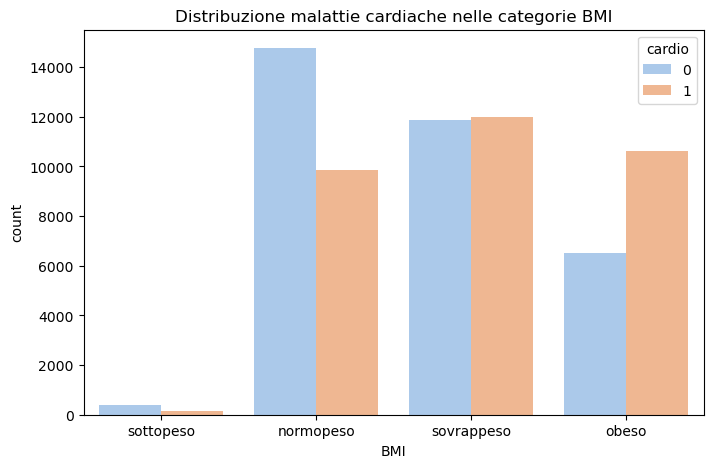

In [36]:
plt.figure(figsize=(8,5))

sns.countplot(data=df_categorical,
              x='bmi_cat',
              order=['sottopeso', 'normopeso', 'sovrappeso', 'obeso'],
              hue='cardio',
              palette='pastel')

plt.title('Distribuzione malattie cardiache nelle categorie BMI')
plt.xlabel('BMI')
plt.show()

In [37]:
print(DATA_DIR)

/Users/simonecammarosano/Desktop/hearth_disease_dataset/data


In [38]:
output_path = os.path.join(DATA_DIR, "cardio_clean.csv")
df_categorical.to_csv(output_path, index=False)

In [39]:
df.groupby("smoke")["cardio"].mean()

smoke
0    0.502107
1    0.474793
Name: cardio, dtype: float64

In [40]:
df.groupby("alco")["cardio"].mean()


alco
0    0.500574
1    0.484325
Name: cardio, dtype: float64

In [41]:
df_cleaned[df_cleaned['age'] < 30]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5877,8850,29,1,175,59.0,120,80,1,1,0,0,1,0
21129,31922,29,2,175,92.0,100,60,1,1,0,0,1,0
28982,43842,29,1,159,59.0,120,80,1,1,0,0,1,0
